In [15]:
import pandas as pd
import json
import numpy as np


from imagedata_NeoroScan import *
from image_loading import * 
print("All Prerequisites Loaded Successfully")

All Prerequisites Loaded Successfully


In [2]:
print("Medical Training Sets =",len(medical_train))
print("Medical Testing Sets =",len(medical_test))

Medical Training Sets = 4
Medical Testing Sets = 4


In [3]:
print("Structure of Training Images :")
str_training = structure_img(medical_train)

Structure of Training Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 3157
    Type: <class 'PIL.Image.Image'>


In [4]:
print("Structure of Testing Images :")
str_testing = structure_img(medical_test)

Structure of Testing Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 136
    Type: <class 'PIL.Image.Image'>


In [5]:
print("Structre Of Glioma Training Images:")
str_glioma_tr = structure_img(glioma_train)

Structre Of Glioma Training Images:
Type: <class 'list'>
Lenght: 3157
  Type: <class 'PIL.Image.Image'>


Diplaying Glioma Images


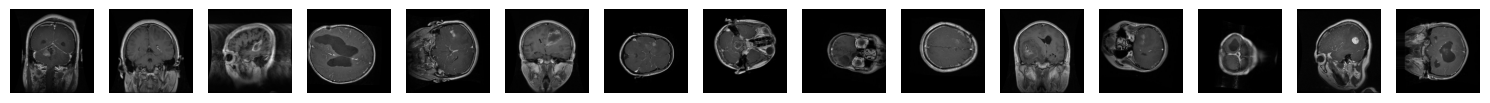

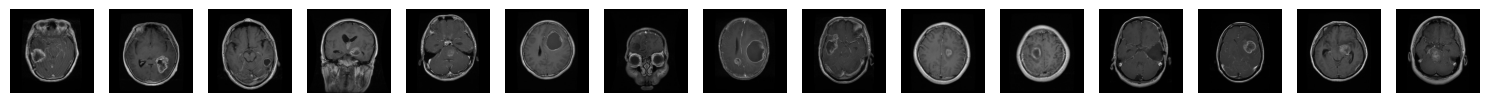

In [6]:
print("Diplaying Glioma Images")
g_train = display_img(glioma_train)
g_test = display_img(glioma_test)

Displaying Meningioma Images


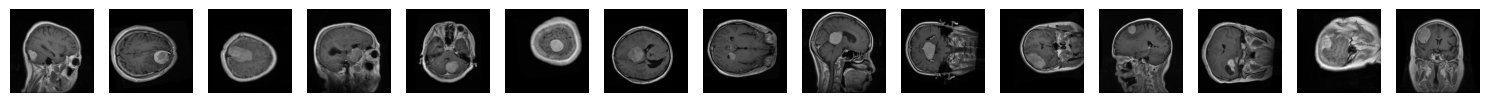

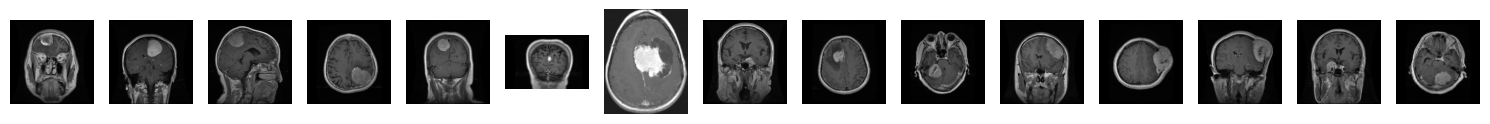

In [7]:
print("Displaying Meningioma Images")

m_train = display_img(meningioma_train)
m_test = display_img(meningioma_test)


Displaying Non Tumor Images


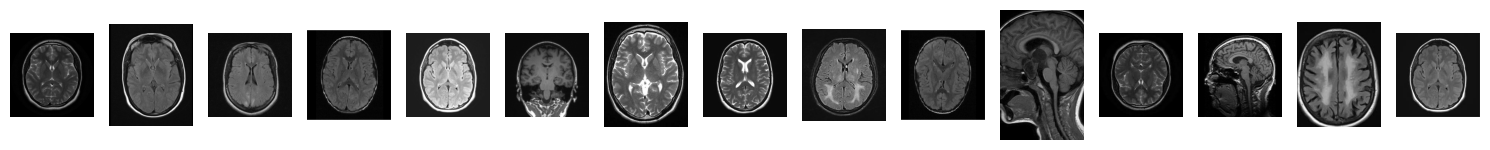

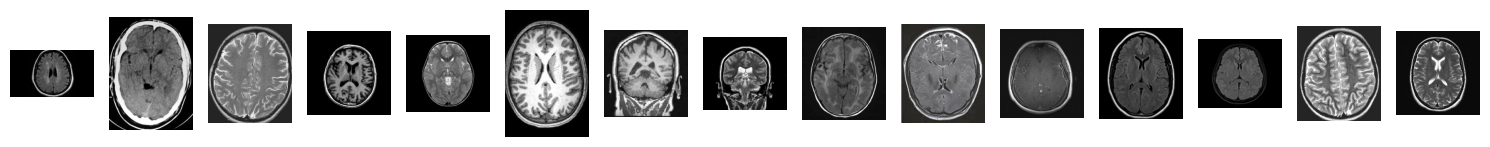

In [8]:
print("Displaying Non Tumor Images")
nt_train = display_img(non_tumor_train)
nt_test = display_img(non_tumor_test)

Displaying Pituitary Tumor Images


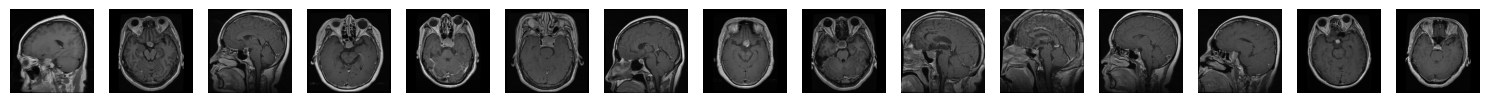

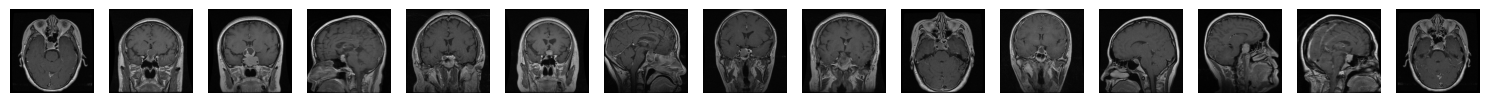

In [9]:
print('Displaying Pituitary Tumor Images')

p_train = display_img(pituitary_train)
p_test = display_img(pituitary_test)

In [10]:
import torch, torchvision.transforms as T
from torchvision import models

model = models.resnet50(pretrained = True)
model = torch.nn.Sequential(*list(model.children()))[:-1]

C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
print("Vectorising Glioma Training Images")
g_tr = []
for img in glioma_train[:10]:
    prep = T.Compose([T.Resize((256,256)), 
                      T.CenterCrop((224,224)), 
                      T.Grayscale(num_output_channels=3), 
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)

    g_tr.append(model(tensor))

print("Vectorising Glioma Testing Images")
g_ts = []

for img in glioma_test[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    g_ts.append(model(tensor))

print("Glioma Vectorisation completed !")
print("Glioma Train Data",g_tr,sep= "\n")
print("Glioma Test Data",g_ts,sep="\n")

    

    

Vectorising Glioma Training Images
Vectorising Glioma Testing Images
Glioma Vectorisation completed !
Glioma Train Data
[tensor([[[[0.3333]],

         [[0.5695]],

         [[0.5001]],

         ...,

         [[0.3935]],

         [[0.5147]],

         [[0.4060]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3595]],

         [[0.6004]],

         [[0.5049]],

         ...,

         [[0.3744]],

         [[0.5177]],

         [[0.3598]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3705]],

         [[0.4568]],

         [[0.5036]],

         ...,

         [[0.3586]],

         [[0.4965]],

         [[0.3396]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3660]],

         [[0.5514]],

         [[0.5171]],

         ...,

         [[0.3521]],

         [[0.4850]],

         [[0.3511]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3222]],

         [[0.5465]],

         [[0.5354]],

         ...,

         [[0.3622]],

         [[0.5507]],

         [[0.3657]]]], grad_fn=<MeanBackward1>), tensor([[

In [12]:
print("Vectorising Meningioma Training Images")
m_tr = []
for img in meningioma_train[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    
    tensor = prep(img).unsqueeze(0)
    m_tr.append(model(tensor))

print("Vectorising Meningioma Testing Images")

m_ts = []
for img in meningioma_test[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    m_ts.append(model(tensor))

print("Meningioma Vectorisation Completed !")
print("Meningioma Train Data", m_tr, sep="\n")
print("Meningioma Test Data", m_ts, sep="\n")

Vectorising Meningioma Training Images
Vectorising Meningioma Testing Images
Meningioma Vectorisation Completed !
Meningioma Train Data
[tensor([[[[0.3434]],

         [[0.6432]],

         [[0.4737]],

         ...,

         [[0.3672]],

         [[0.4804]],

         [[0.3415]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3631]],

         [[0.5594]],

         [[0.5256]],

         ...,

         [[0.3795]],

         [[0.4665]],

         [[0.3660]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3539]],

         [[0.5532]],

         [[0.4858]],

         ...,

         [[0.3486]],

         [[0.4958]],

         [[0.3405]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3747]],

         [[0.5834]],

         [[0.4819]],

         ...,

         [[0.3698]],

         [[0.4917]],

         [[0.3529]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3676]],

         [[0.4929]],

         [[0.5310]],

         ...,

         [[0.3729]],

         [[0.4782]],

         [[0.3579]]]], grad_fn=<MeanBackwa

In [13]:
print("Vectorising Pituitary Training Images")
p_tr=[]

for img in pituitary_train[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels =3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    p_tr.append(model(tensor))

print("Vectorising Pituitary Testing Images")
p_ts = []

for img in pituitary_test[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    p_ts.append(model)

print("Pituitary Vectorisation Completed !")
print("Pituitary Train Data", p_tr, sep = "\n")
print("Pituitary Test Data", p_ts, sep = "\n")

Vectorising Pituitary Training Images
Vectorising Pituitary Testing Images
Pituitary Vectorisation Completed !
Pituitary Train Data
[tensor([[[[0.3438]],

         [[0.4866]],

         [[0.5027]],

         ...,

         [[0.3864]],

         [[0.4663]],

         [[0.3674]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3500]],

         [[0.5585]],

         [[0.4856]],

         ...,

         [[0.3339]],

         [[0.4832]],

         [[0.3450]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3917]],

         [[0.5555]],

         [[0.4880]],

         ...,

         [[0.3453]],

         [[0.4510]],

         [[0.3273]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3629]],

         [[0.5460]],

         [[0.4608]],

         ...,

         [[0.3303]],

         [[0.4430]],

         [[0.3380]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3897]],

         [[0.5460]],

         [[0.5252]],

         ...,

         [[0.3322]],

         [[0.4983]],

         [[0.3522]]]], grad_fn=<MeanBackward1>

In [14]:
print("Vectorising Non Tumor Training Images")
nt_tr = []
for img in non_tumor_train[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    nt_tr.append(model(tensor))

print("Vectorising Non Tumor Testing Images ")
nt_ts = []
for img in non_tumor_test[:10]:
    prep = T.Compose([T.Resize((256,256)),
                      T.CenterCrop((224,224)),
                      T.Grayscale(num_output_channels=3),
                      T.ToTensor()])
    tensor = prep(img).unsqueeze(0)
    nt_ts.append(model(tensor))

print("Vectorisation of Non Tumor Testing Images Completed !")
print("Non Tumor Train Data", nt_tr, sep = "\n")
print("Non Tumor Test Data", nt_ts, sep = "\n")


Vectorising Non Tumor Training Images
Vectorising Non Tumor Testing Images 
Vectorisation of Non Tumor Testing Images Completed !
Non Tumor Train Data
[tensor([[[[0.3497]],

         [[0.5278]],

         [[0.5183]],

         ...,

         [[0.3472]],

         [[0.5034]],

         [[0.3210]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3638]],

         [[0.5299]],

         [[0.4741]],

         ...,

         [[0.3644]],

         [[0.4816]],

         [[0.3376]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3431]],

         [[0.5675]],

         [[0.4584]],

         ...,

         [[0.3460]],

         [[0.5169]],

         [[0.3531]]]], grad_fn=<MeanBackward1>), tensor([[[[0.3369]],

         [[0.5336]],

         [[0.5261]],

         ...,

         [[0.3813]],

         [[0.4846]],

         [[0.3444]]]], grad_fn=<MeanBackward1>), tensor([[[[0.4068]],

         [[0.5341]],

         [[0.5019]],

         ...,

         [[0.3685]],

         [[0.4490]],

         [[0.3460]]]], grad

In [16]:
dfs = []
pass